In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Linear Regression prediction model
def linear_prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model

#prediction
def linear_prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

#prediction of population add DataFrame
def prediction_dataFrame(model, f_year):
    #calculate population from year to f_year
    year = 2023
    future_year = []
    future_population = []
    while year <= f_year:
      future_population.append(linear_prediction(model, year))
      future_year.append(year)
      year += 10

    #add these lists in DataFrame
    future = {'Год': future_year, 'Население': future_population}
    future_df = pd.DataFrame(future)
    return future_df

def main():
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('populkz.csv')

    #cleaning df
    del df['Прирост населения']
    #convert 'Население' numbers to float (6,757,728 -> 6757728)
    i = 0
    for number in df['Население']:
      df['Население'][i] = (number.replace(',', ''))
      i += 1
    df = df.astype(float)

    model = linear_prediction_model(df)
    future_df = prediction_dataFrame(model, year)

    #add future_df data in df
    df1 = df.append(future_df, ignore_index = True)

    #print population in the year
    n = linear_prediction(model,year)
    print(f"\n Population in {year} will be {n:,d}")

    #scatterplot from beginning of the populkz.csv to the year
    sns.scatterplot(data = df1, x = 'Год', y = 'Население')

Please input the year to predict: 2500

 Population in 2500 will be 83,949,353


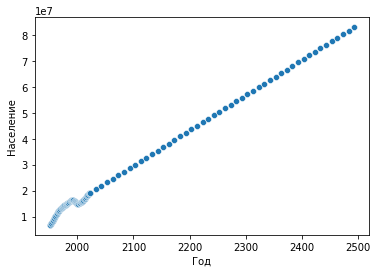

In [ ]:
if __name__ == "__main__":
    main()